In [85]:
# !pip install xlrd
# !pip install xgboost-cpu

In [86]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x:'%.3f' %x)
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import sklearn
import scipy.stats as stats

In [87]:
concrete_data = pd.read_excel("Concrete_Data.xls")
df = concrete_data.copy()
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.053
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.296


In [88]:
df.shape

(1030, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [90]:
# Finding the missing values in data set.
df.isna().mean()*100

Cement (component 1)(kg in a m^3 mixture)               0.000
Blast Furnace Slag (component 2)(kg in a m^3 mixture)   0.000
Fly Ash (component 3)(kg in a m^3 mixture)              0.000
Water  (component 4)(kg in a m^3 mixture)               0.000
Superplasticizer (component 5)(kg in a m^3 mixture)     0.000
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    0.000
Fine Aggregate (component 7)(kg in a m^3 mixture)       0.000
Age (day)                                               0.000
Concrete compressive strength(MPa, megapascals)         0.000
dtype: float64

In [91]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.166,73.895,54.187,181.566,6.203,972.919,773.579,45.662,35.818
std,104.507,86.279,63.996,21.356,5.973,77.754,80.175,63.170,16.706
min,102.000,0.000,0.000,121.750,0.000,801.000,594.000,1.000,2.332
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.707
50%,272.900,22.000,0.000,185.000,6.350,968.000,779.510,28.000,34.443
75%,350.000,142.950,118.270,192.000,10.160,1029.400,824.000,56.000,46.136
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.599


In [92]:
col = df.columns.values

# EDA

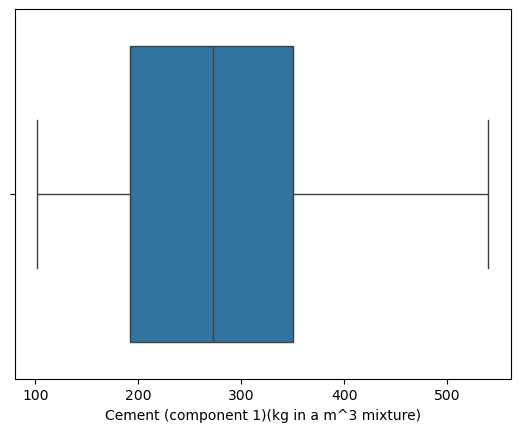

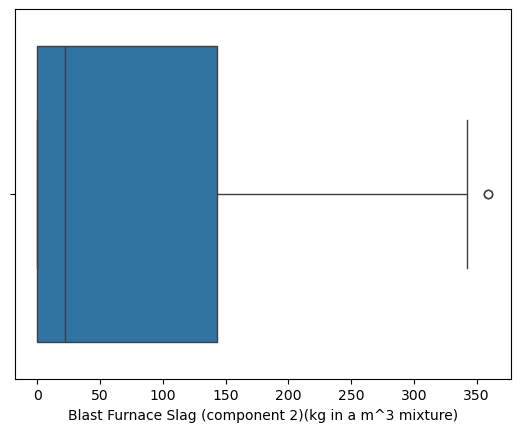

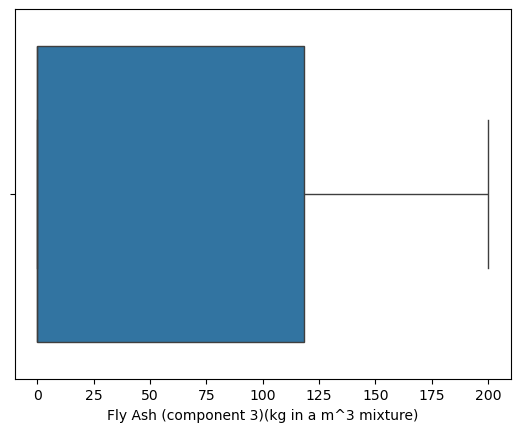

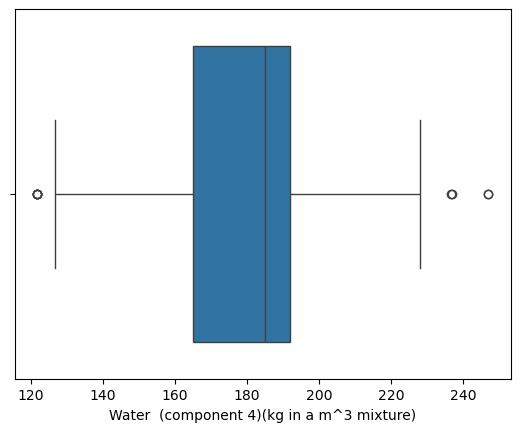

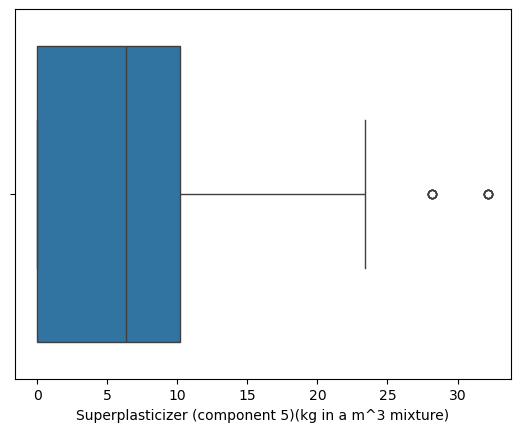

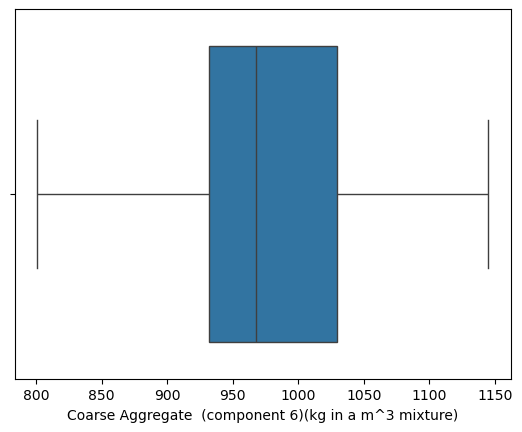

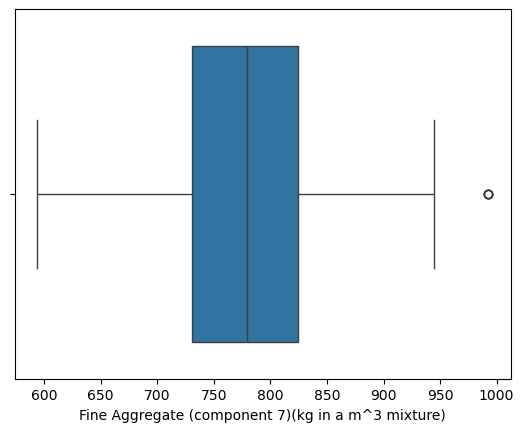

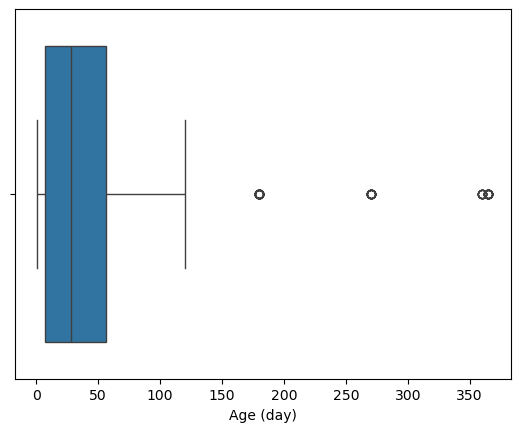

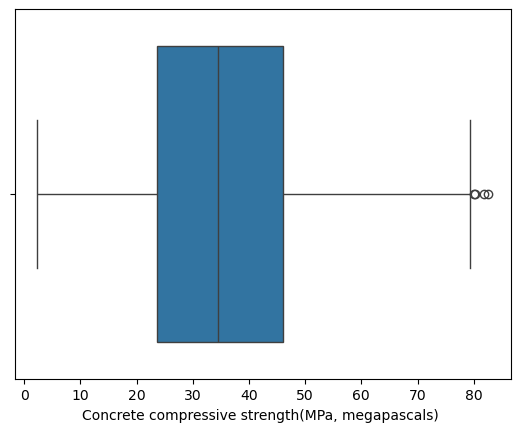

In [93]:
# Outlier detection using box plot.(Outlier present in some of columns)
for i in df.columns.values:
    sns.boxplot(df,x=df[i])
    plt.show()

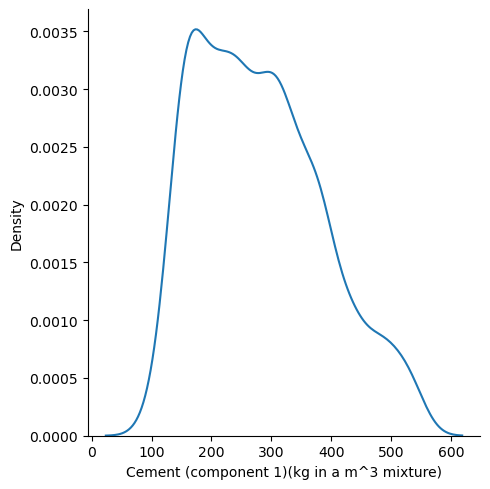

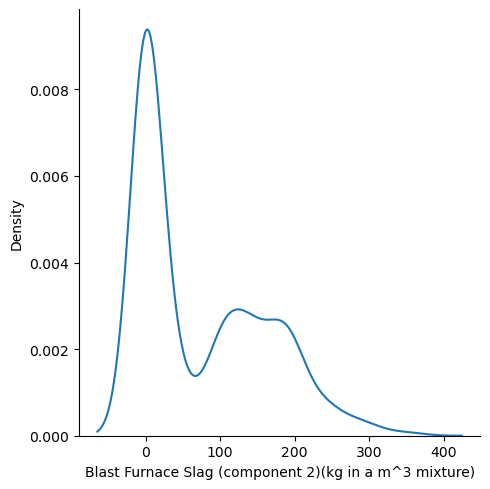

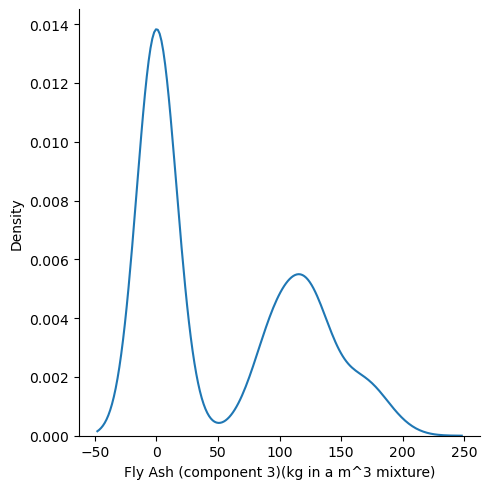

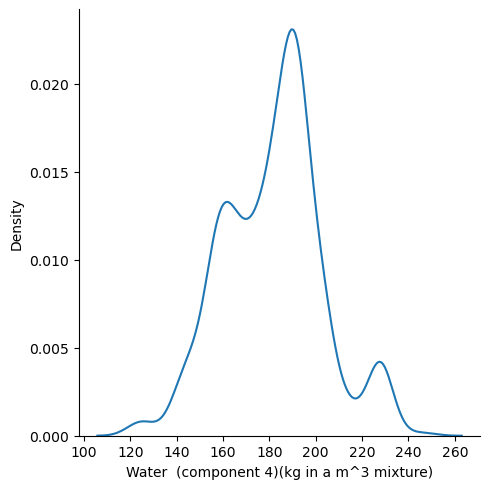

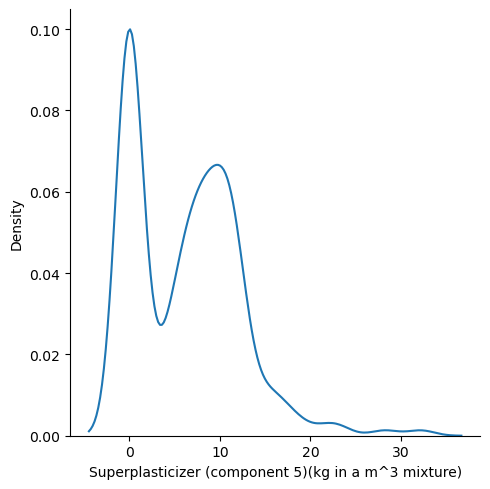

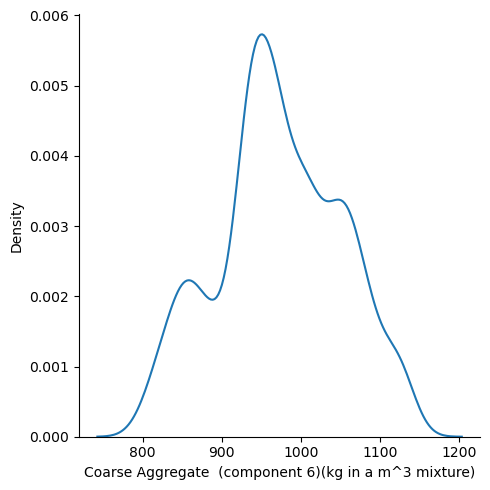

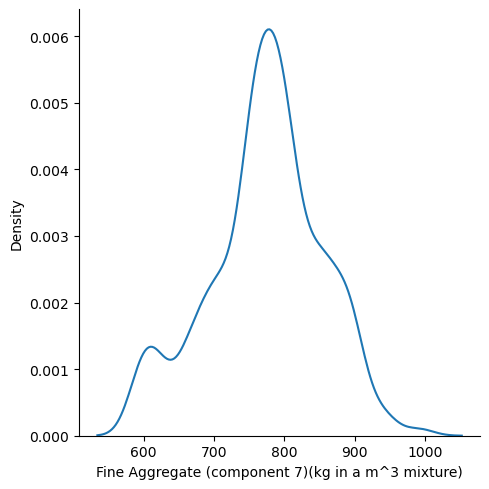

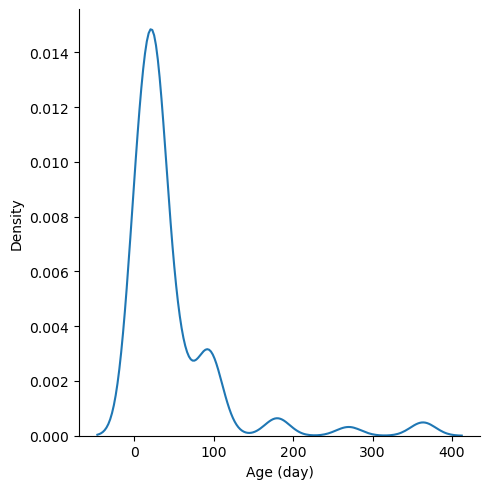

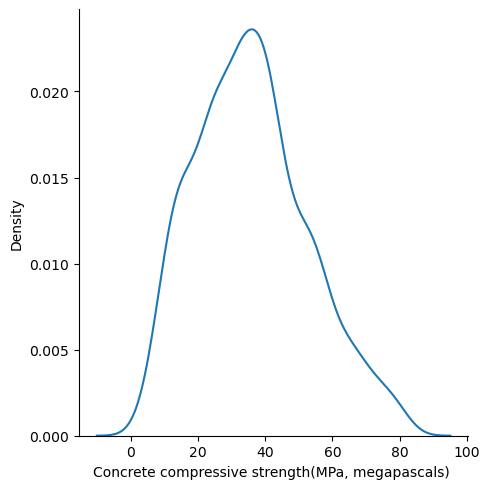

In [94]:
# to check ditribution of data (data is not normally distributed)
for i in df.columns.values:
    sns.displot(df,x=df[i],kind='kde')
    plt.show()

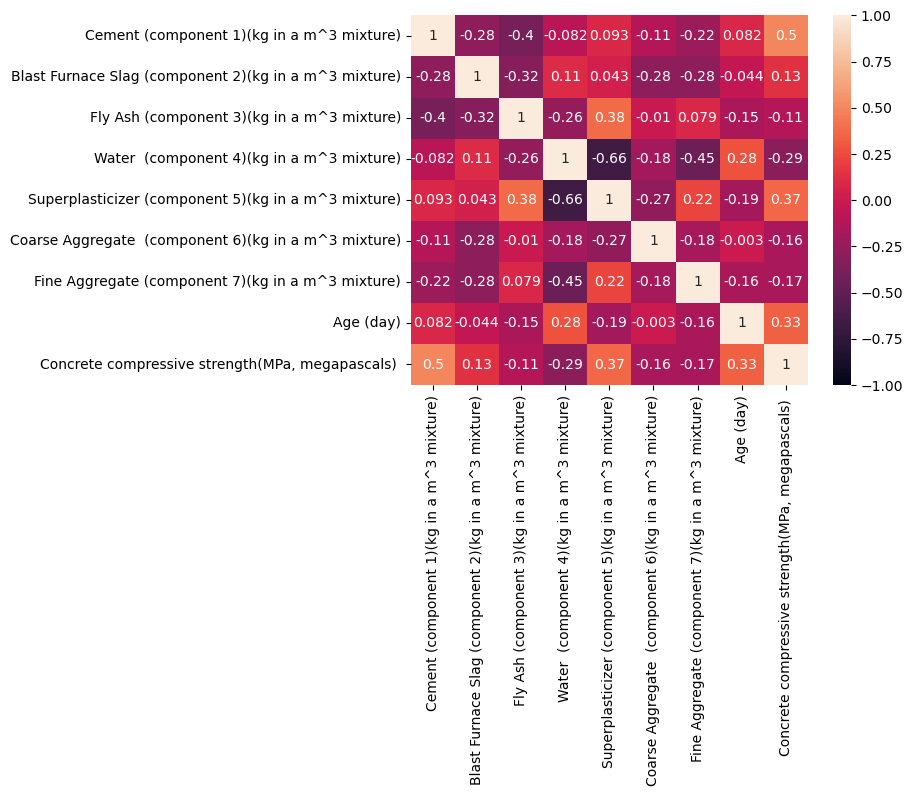

In [95]:
# correltion of matrix
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

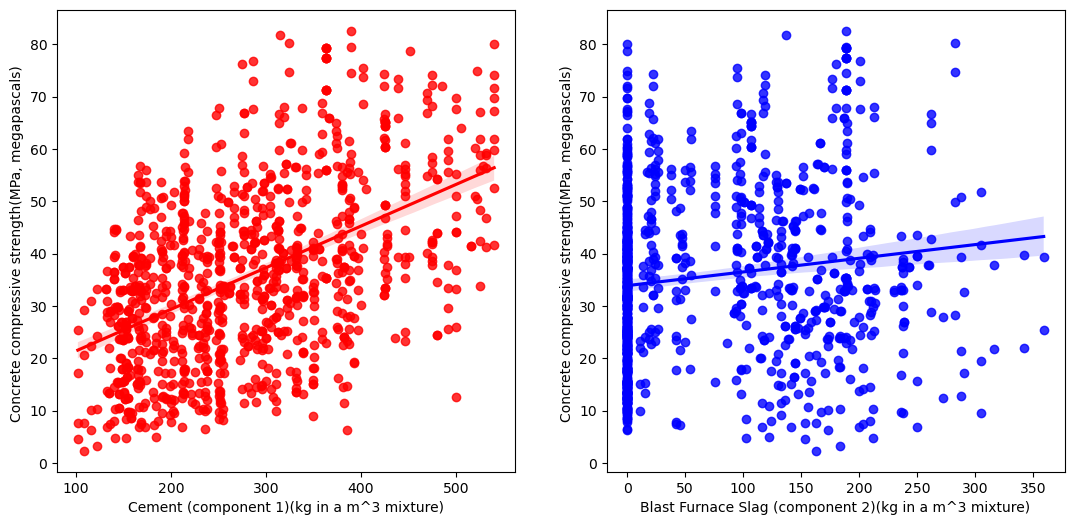

In [96]:
fig,ax = plt.subplots(1,2,figsize=[13,6])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Cement (component 1)(kg in a m^3 mixture)',order=1,color='r',ax=ax[0])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Blast Furnace Slag (component 2)(kg in a m^3 mixture)',order=1,color='b',ax=ax[1])
plt.show()

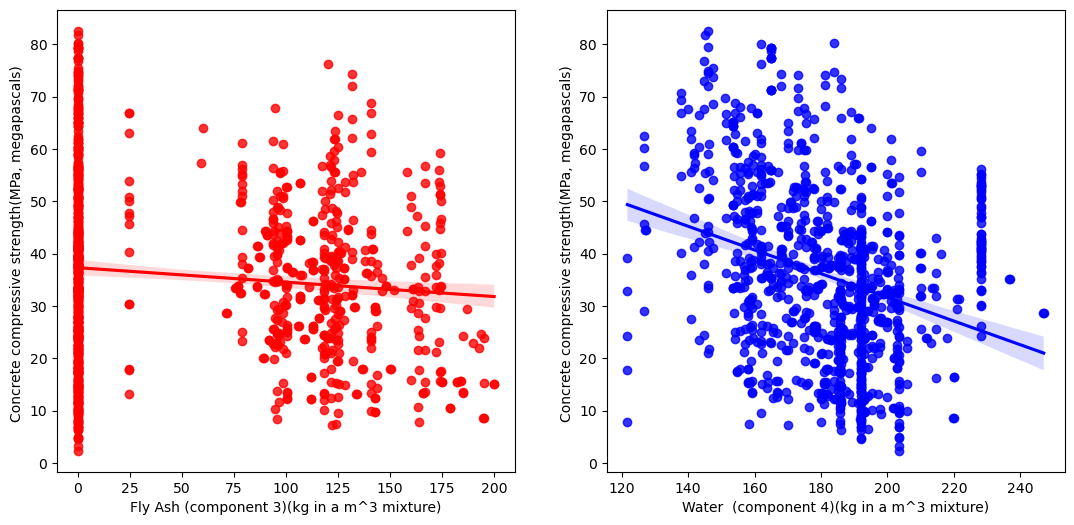

In [97]:
fig,ax = plt.subplots(1,2,figsize=[13,6])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Fly Ash (component 3)(kg in a m^3 mixture)',order=1,color='r',ax=ax[0])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Water  (component 4)(kg in a m^3 mixture)',order=1,color='b',ax=ax[1])
plt.show()

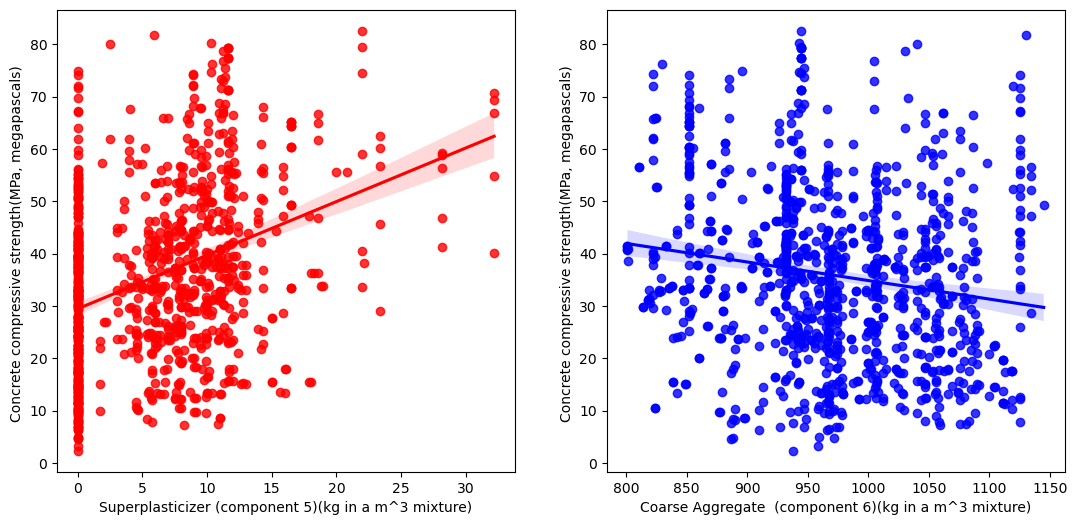

In [98]:
fig,ax = plt.subplots(1,2,figsize=[13,6])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Superplasticizer (component 5)(kg in a m^3 mixture)',order=1,color='r',ax=ax[0])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Coarse Aggregate  (component 6)(kg in a m^3 mixture)',order=1,color='b',ax=ax[1])
plt.show()

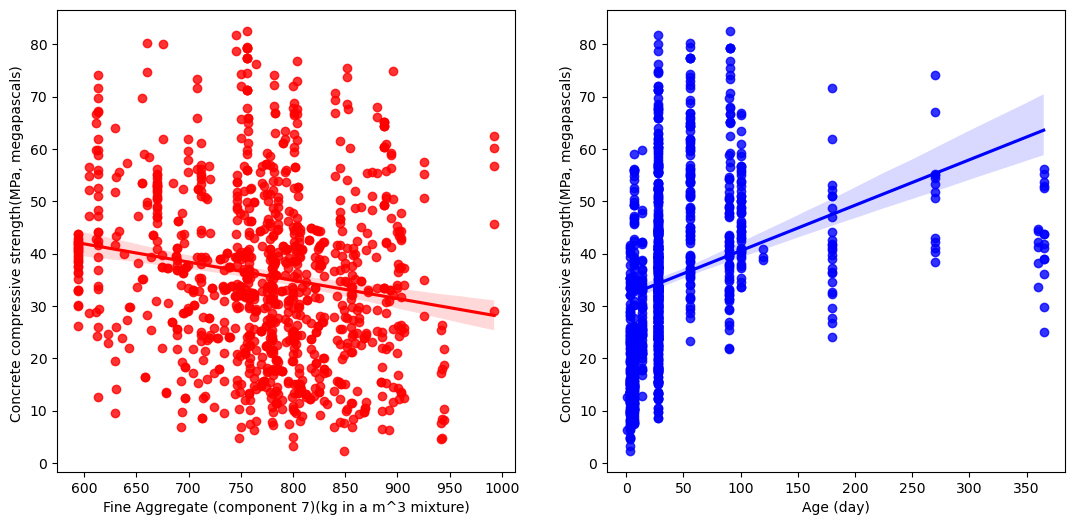

In [99]:
fig,ax = plt.subplots(1,2,figsize=[13,6])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Fine Aggregate (component 7)(kg in a m^3 mixture)',order=1,color='r',ax=ax[0])
sns.regplot(df,y='Concrete compressive strength(MPa, megapascals) ',x='Age (day)',order=1,color='b',ax=ax[1])
plt.show()

#### Summary from Graph
##### * There is no missing values present in the data set.
##### * Distribution of data(df) is some how skewness present.
##### * Some columns has outlier data point present in i.e[Fine Aggregate(component 7)(kg in a m^3 mixture), Age(day), Blast Furnace Slag (component 2)(kg in a m^3 mixture), Water(component 4)(kg in a m^3 mixture), 'Superplasticize (component 5)(kg in a m^3 mixture]'
##### * There independent col posess positive and negative correlation there no strong correlation present in the data set.
#######. ref = Modeling of strength of high-performance concrete using artificial neural networks By I. Yeh. 1998
Published in Cement and Concrete Research, Vol. 28, No. 12.



In [100]:
# missing value tratement
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

In [101]:
lower_limit

Cement (component 1)(kg in a m^3 mixture)                -44.062
Blast Furnace Slag (component 2)(kg in a m^3 mixture)   -214.425
Fly Ash (component 3)(kg in a m^3 mixture)              -177.405
Water  (component 4)(kg in a m^3 mixture)                124.250
Superplasticizer (component 5)(kg in a m^3 mixture)      -15.240
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     785.900
Fine Aggregate (component 7)(kg in a m^3 mixture)        591.375
Age (day)                                                -66.500
Concrete compressive strength(MPa, megapascals)           -9.937
dtype: float64

In [102]:
upper_limit

Cement (component 1)(kg in a m^3 mixture)                586.438
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    357.375
Fly Ash (component 3)(kg in a m^3 mixture)               295.675
Water  (component 4)(kg in a m^3 mixture)                232.650
Superplasticizer (component 5)(kg in a m^3 mixture)       25.400
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    1175.500
Fine Aggregate (component 7)(kg in a m^3 mixture)        963.575
Age (day)                                                129.500
Concrete compressive strength(MPa, megapascals)           79.780
dtype: float64

In [103]:
# capping the ouliers in the data set.
for i in df.columns:
     if df[i].dtype.name != 'object':
        q3 = df[i].quantile(0.75)
        q1 = df[i].quantile(0.25)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        df[i] = np.where(df[i] > upper,upper,np.where(df[i] < lower,lower,df[i]))

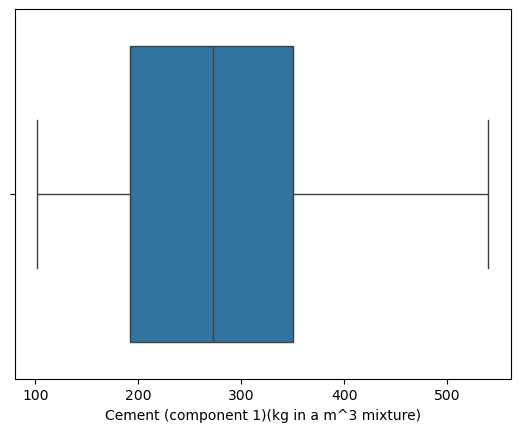

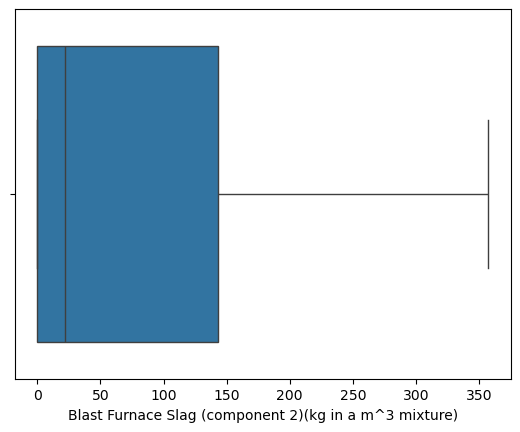

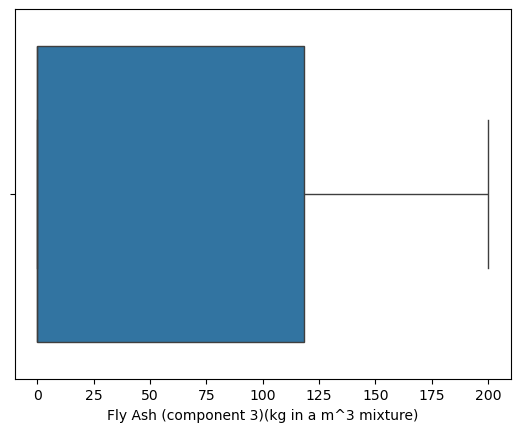

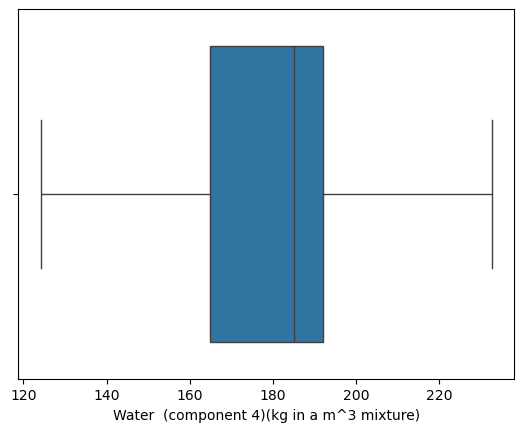

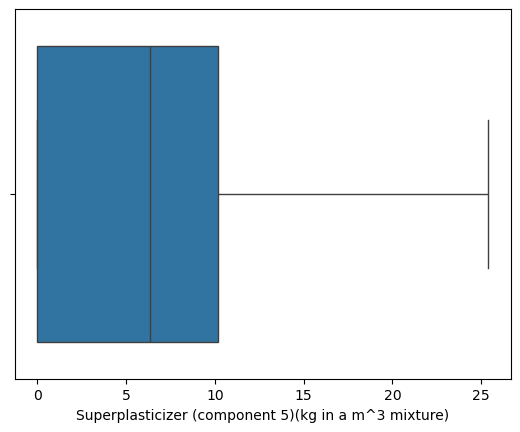

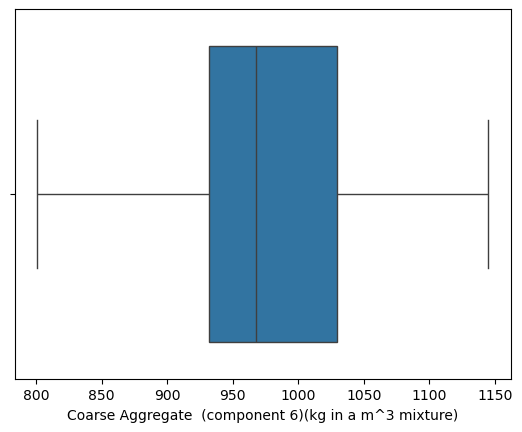

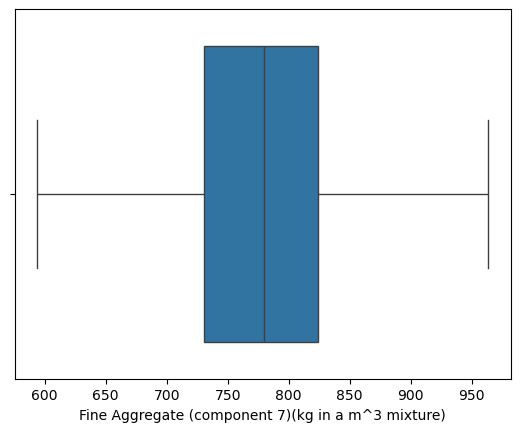

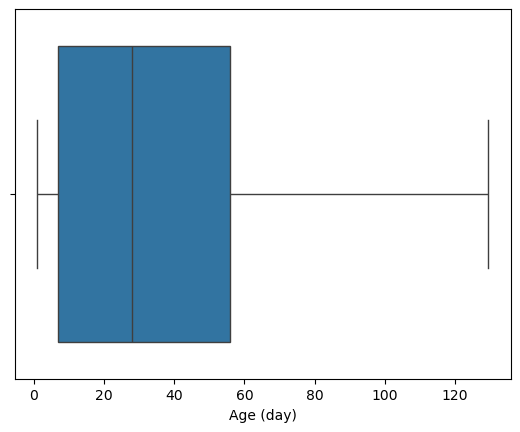

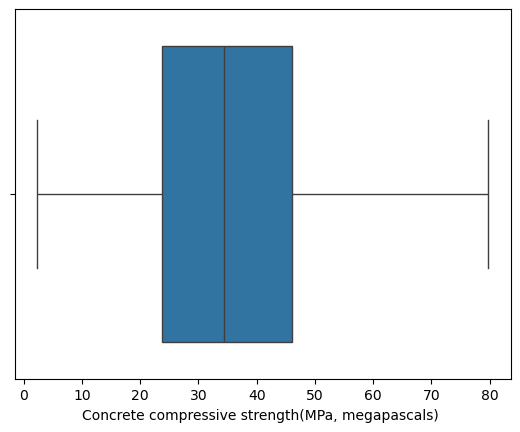

In [104]:
# after treating oulier
for i in df.columns.values:
    sns.boxplot(df,x=df[i])
    plt.show()

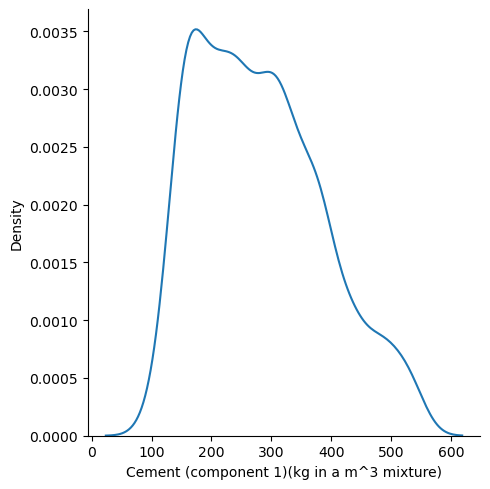

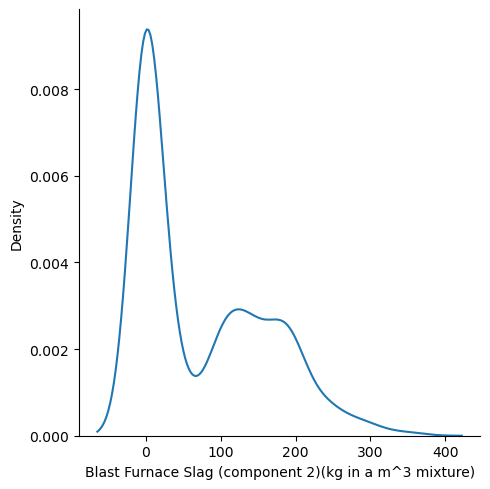

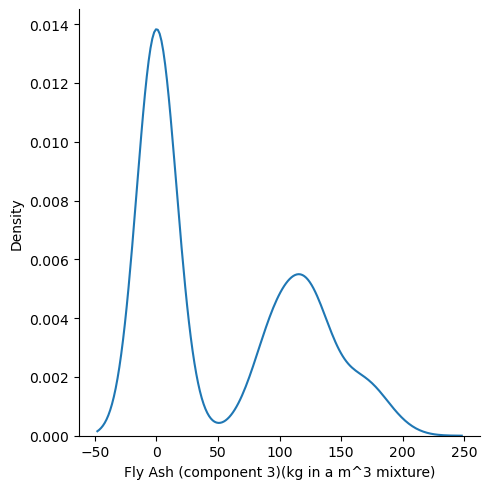

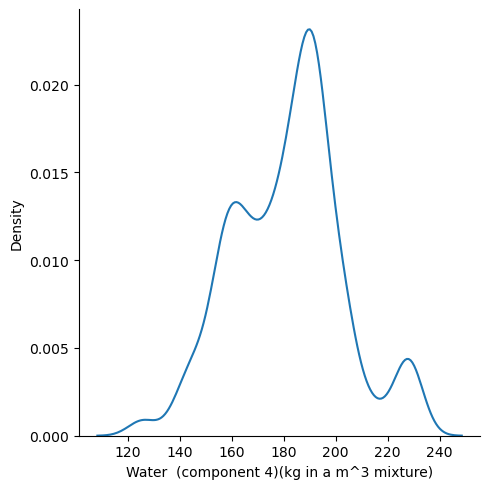

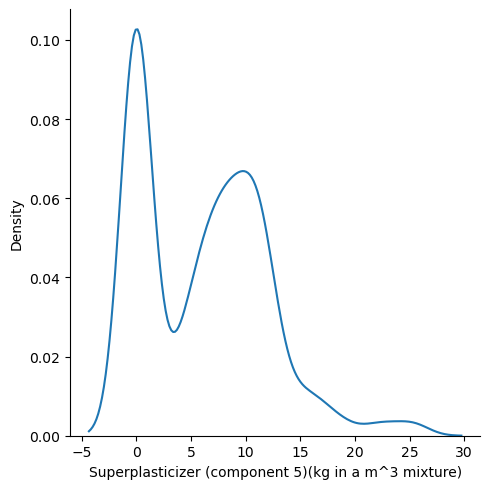

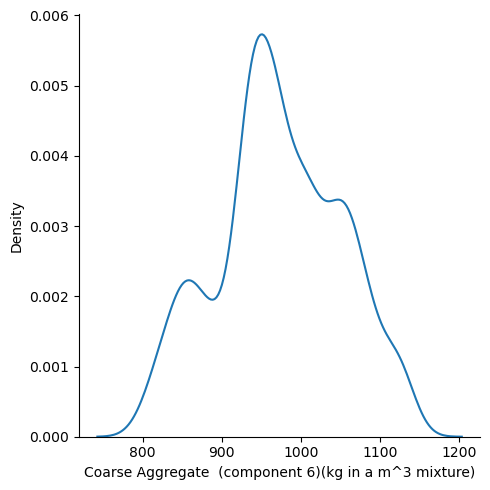

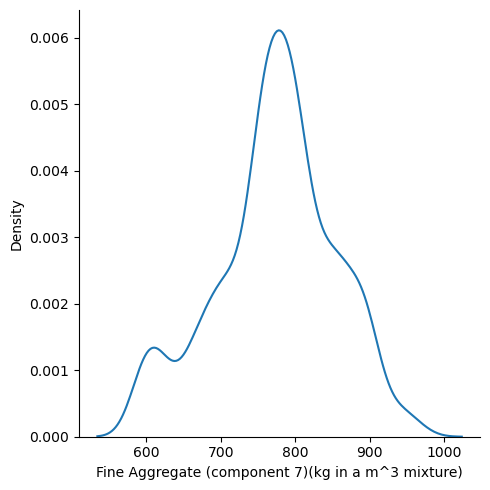

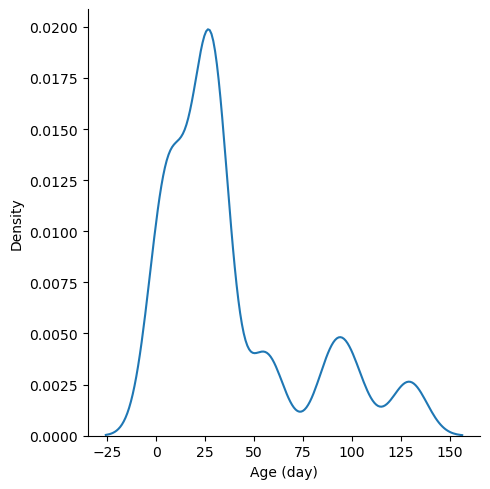

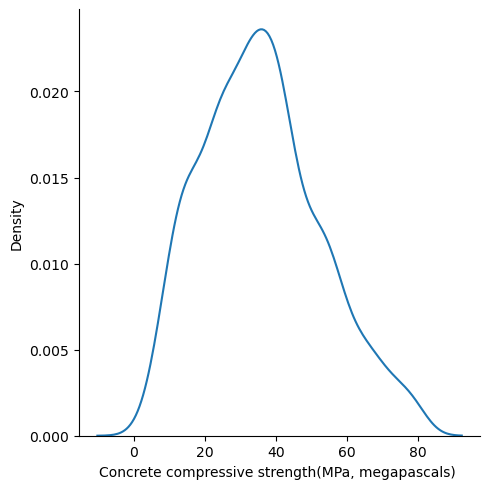

In [105]:
# after treatment of outlier to check ditribution of data 
for i in df.columns.values:
    sns.displot(df,x=df[i],kind='kde')
    plt.show()

In [106]:
# spliting the data into dependent variaable and independent variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [107]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingRegressor,BaggingRegressor

# Model-1 LR

In [109]:
model_1 =Pipeline([("STD_Scaler",StandardScaler()),("Linear_reg",LinearRegression())])
model_1

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Linear_reg', LinearRegression())])

In [110]:
model_1.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Linear_reg', LinearRegression())])

In [111]:
y_pred_test = model_1.predict(x_test)

In [112]:
y_pred_train = model_1.predict(x_train)

In [113]:
def performance_metrics(y_actual,y_prede,data = 'Test Data'):
    print(f"Performance metric for {data}")
    print()
    print("R2 Score is :",r2_score(y_actual,y_prede))
    print("MSE is :",mean_squared_error(y_actual,y_prede))
    print("RMSE is :",root_mean_squared_error(y_actual,y_prede))  

In [114]:
performance_metrics(y_test,y_pred_test)

Performance metric for Test Data

R2 Score is : 0.7076026675014927
MSE is : 79.88005928975818
RMSE is : 8.937564505487956


In [115]:
performance_metrics(y_train,y_pred_train,data="Train Data")

Performance metric for Train Data

R2 Score is : 0.7365095950639196
MSE is : 73.90838429035142
RMSE is : 8.596998562891088


# Model 2 KNN

In [116]:
model_2 =Pipeline([("STD_Scaler",StandardScaler()),("KNN",KNeighborsRegressor())])
model_2

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('KNN', KNeighborsRegressor())])

In [117]:
model_2.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('KNN', KNeighborsRegressor())])

In [118]:
y_pred_test_knn = model_2.predict(x_test)
y_pred_train_knn = model_2.predict(x_train)

In [119]:
performance_metrics(y_test,y_pred_test_knn)

Performance metric for Test Data

R2 Score is : 0.722553343621614
MSE is : 75.79568244304613
RMSE is : 8.706071584994355


In [120]:
performance_metrics(y_train,y_pred_train_knn,data="Train Data")

Performance metric for Train Data

R2 Score is : 0.8547139518847214
MSE is : 40.75236469705744
RMSE is : 6.383757882083048


# Model-3 DT

In [121]:
model_3 =Pipeline([("STD_Scaler",StandardScaler()),("Decision Tree",DecisionTreeRegressor())])
model_3

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeRegressor())])

In [122]:
model_3.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeRegressor())])

In [123]:
y_pred_test_dt = model_3.predict(x_test)
y_pred_train_dt = model_3.predict(x_train)

In [124]:
performance_metrics(y_test,y_pred_test_dt)

Performance metric for Test Data

R2 Score is : 0.7982462490154744
MSE is : 55.11712932831658
RMSE is : 7.4240911449359634


In [125]:
performance_metrics(y_train,y_pred_train_dt,data="Train Data")

Performance metric for Train Data

R2 Score is : 0.996633146245099
MSE is : 0.9443938621863622
RMSE is : 0.9717992911020065


# Model-4 SVM

In [126]:
model_4 = Pipeline([("STD_Scaler",StandardScaler()),("SVM",SVR())])
model_4

Pipeline(steps=[('STD_Scaler', StandardScaler()), ('SVM', SVR())])

In [127]:
model_4.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()), ('SVM', SVR())])

In [128]:
y_pred_test_svr = model_4.predict(x_test)
y_pred_train_svr = model_4.predict(x_train)

In [129]:
performance_metrics(y_test,y_pred_test_svr)

Performance metric for Test Data

R2 Score is : 0.6645664679035322
MSE is : 91.63712337141664
RMSE is : 9.572728104956113


In [130]:
performance_metrics(y_train,y_pred_train_svr,data="Train Data")

Performance metric for Train Data

R2 Score is : 0.7282367889631247
MSE is : 76.22888523081426
RMSE is : 8.730915486408872


# Performing Random search cv for svm model-4

In [131]:
param_grid = {"kernel":["rbf", "sigmoid"]}

In [132]:
%%time
grid = RandomizedSearchCV(SVR(),param_distributions=param_grid,n_jobs=-1)
grid.fit(x_train,y_train)

CPU times: total: 125 ms
Wall time: 363 ms


RandomizedSearchCV(estimator=SVR(), n_jobs=-1,
                   param_distributions={'kernel': ['rbf', 'sigmoid']})

In [133]:
grid.best_params_

{'kernel': 'rbf'}

# Model-5 RF

In [134]:
model_5 = Pipeline([("STD_Scaler",StandardScaler()),("RF",RandomForestRegressor())])
model_5

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('RF', RandomForestRegressor())])

In [135]:
model_5.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('RF', RandomForestRegressor())])

In [136]:
y_pred_test_rf = model_5.predict(x_test)
y_pred_train_rf = model_5.predict(x_train)

In [137]:
print(performance_metrics(y_test,y_pred_test_rf))
print()
print(performance_metrics(y_train,y_pred_train_rf,data="Train Data"))

Performance metric for Test Data

R2 Score is : 0.8840148115885537
MSE is : 31.68600632527112
RMSE is : 5.629032450188142
None

Performance metric for Train Data

R2 Score is : 0.98478482910662
MSE is : 4.267816498684617
RMSE is : 2.065869429243924
None


# Model-6 Baggging Regressor

In [138]:
model_6 = Pipeline([("STD_Scaler",StandardScaler()),("Bagging Regressor",BaggingRegressor())])
model_6

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Bagging Regressor', BaggingRegressor())])

In [139]:
model_6.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Bagging Regressor', BaggingRegressor())])

In [140]:
y_pred_test_br = model_6.predict(x_test)
y_pred_train_br = model_6.predict(x_train)

In [141]:
print(performance_metrics(y_test,y_pred_test_br))
print()
print(performance_metrics(y_train,y_pred_train_br,data='Train'))

Performance metric for Test Data

R2 Score is : 0.875863262792569
MSE is : 33.91292883363544
RMSE is : 5.823480817658408
None

Performance metric for Train

R2 Score is : 0.977617235335512
MSE is : 6.278308209002066
RMSE is : 2.5056552454402152
None


# Model-7 Voting Regressor

In [142]:
estimators = [("DT",DecisionTreeRegressor()),("RF",RandomForestRegressor()),("BR",BaggingRegressor())]

In [143]:
model_7 = Pipeline([("STD_Scaler",StandardScaler()),("Voting Regressor",VotingRegressor(estimators=estimators,n_jobs=-1))])
model_7

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Voting Regressor',
                 VotingRegressor(estimators=[('DT', DecisionTreeRegressor()),
                                             ('RF', RandomForestRegressor()),
                                             ('BR', BaggingRegressor())],
                                 n_jobs=-1))])

In [144]:
model_7.fit(x_train,y_train)

Pipeline(steps=[('STD_Scaler', StandardScaler()),
                ('Voting Regressor',
                 VotingRegressor(estimators=[('DT', DecisionTreeRegressor()),
                                             ('RF', RandomForestRegressor()),
                                             ('BR', BaggingRegressor())],
                                 n_jobs=-1))])

In [145]:
y_pred_test_vr = model_7.predict(x_test)
y_pred_train_vr = model_7.predict(x_train)

In [146]:
print(performance_metrics(y_test,y_pred_test_vr))
print()
print(performance_metrics(y_train,y_pred_train_vr,data='Train'))

Performance metric for Test Data

R2 Score is : 0.8726389595222505
MSE is : 34.793776597191986
RMSE is : 5.898624975126999
None

Performance metric for Train

R2 Score is : 0.9911654215808988
MSE is : 2.47807663812491
RMSE is : 1.5741907883496555
None


## Crossvalidation for voting regressor

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
cv = cross_val_score(model_7,x_train,y_train,cv=5)

In [149]:
cv.mean()

0.8797537627109477

# Model-8 Stacking Regressor

In [150]:
from sklearn.ensemble import StackingRegressor
estimator = [("LR",LinearRegression()),("DT",DecisionTreeRegressor())]
model_8 = StackingRegressor(estimators=estimator,n_jobs=-1)
model_8.fit(x_train,y_train)


StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor())],
                  n_jobs=-1)

In [151]:
y_pred_test_sr = model_8.predict(x_test)
y_pred_train_sr = model_8.predict(x_train)

In [152]:
print(performance_metrics(y_test,y_pred_test_sr))
print()
print(performance_metrics(y_train,y_pred_train_sr,data='Train'))

Performance metric for Test Data

R2 Score is : 0.8445630017693158
MSE is : 42.463850570704075
RMSE is : 6.5164292807260695
None

Performance metric for Train

R2 Score is : 0.9483592276798086
MSE is : 14.4851044827121
RMSE is : 3.805930173126157
None


# Model-9 XGBOOST

In [153]:
import xgboost as xgb

In [154]:
from xgboost import XGBRegressor
model_9 = XGBRegressor(verbosity=1)
model_9.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [155]:
y_pred_test_xgbr = model_9.predict(x_test)
y_pred_train_xgbr = model_9.predict(x_train)

In [156]:
print(performance_metrics(y_test,y_pred_test_xgbr))
print()
print(performance_metrics(y_train,y_pred_train_xgbr,data='Train'))

Performance metric for Test Data

R2 Score is : 0.9098945309490538
MSE is : 24.615922958728767
RMSE is : 4.961443636556679
None

Performance metric for Train

R2 Score is : 0.9960140950949159
MSE is : 1.1180361256085063
RMSE is : 1.057372273898132
None


In [157]:
def save_model(x_train,y_train,x_test,y_test):
    mse_ta = []
    mse_te = []
    r2_ta =  []
    r2_te =  []
    models = ["Linear regression","KNN regressor","Decision tree regressor","SVR","RF regressor","Bagging regressor","Voting regressor","Stacking regressor","XGBOOST regressor"]
    for i in [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9]:
        i.fit(x_train,y_train)
       
        f_test = i.predict(x_test)
        f_train = i.predict(x_train)
        mse_test = mean_squared_error(y_test,f_test)
        mse_train = mean_squared_error(y_train,f_train)
        r2_train = r2_score(y_train,f_train) 
        r2_test = r2_score(y_test,f_test)
        mse_ta.append(mse_train)
        mse_te.append(mse_test)
        r2_ta.append(r2_train)
        r2_te.append(r2_test)
    dic = {"Models" : models,
            "Mean square error(Train)" : mse_ta,
           "Mean square error(Test)" : mse_te,
            "r2 (Train)" : r2_ta,
            "r2(Test)" : r2_te}
    return pd.DataFrame(dic)  

# Final models Results

In [158]:
save_model(x_train,y_train,x_test,y_test)

,Models,Mean square error(Train),Mean square error(Test),r2 (Train),r2(Test)
0,Linear regression,73.908,79.880,0.737,0.708
1,KNN regressor,40.752,75.796,0.855,0.723
2,Decision tree regressor,0.944,52.141,0.997,0.809
3,SVR,76.229,91.637,0.728,0.665
4,RF regressor,4.213,30.383,0.985,0.889
5,Bagging regressor,6.811,32.762,0.976,0.880
6,Voting regressor,2.644,35.516,0.991,0.870
7,Stacking regressor,14.159,41.942,0.950,0.846
8,XGBOOST regressor,1.118,24.616,0.996,0.910


# Cross Validation for XGBOOST regressor

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
cv_xgb = cross_val_score(model_9,x_train,y_train,cv=5,n_jobs=-1,verbose=1)
cv_xgb

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


array([0.91852101, 0.90572939, 0.88127648, 0.89524401, 0.88973623])

In [161]:
#final score cross validation.
cv_xgb.mean()

0.8981014258551318

# Conclusion
#### xgboost regressor will give highest r2 score compare to all models .

In [163]:
from sklearn.decomposition import PCA
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [164]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [165]:
pca = PCA()
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)

In [166]:
pca.explained_variance_ratio_

array([3.66176367e-01, 2.56008226e-01, 1.97859100e-01, 1.09904224e-01,
       3.99920334e-02, 2.78195040e-02, 1.95449212e-03, 2.86053595e-04])

In [167]:
X_train.shape

(721, 8)

In [176]:
for i in range(1,9):
    pca = PCA(n_components = i )
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)
    modelXGB = XGBRegressor()
    modelXGB.fit(X_train_p,Y_train)
    y_preds = modelXGB.predict(X_test_p)
    print(f"R2 score = {r2_score(Y_test,y_preds)} for {i} th Principal component")   

R2 score = 0.16066624840041477 for 1 th Principal component
R2 score = 0.459545073310647 for 2 th Principal component
R2 score = 0.5364209866659262 for 3 th Principal component
R2 score = 0.5706899116804576 for 4 th Principal component
R2 score = 0.6990864364588095 for 5 th Principal component
R2 score = 0.8910926780056686 for 6 th Principal component
R2 score = 0.8912560291150544 for 7 th Principal component
R2 score = 0.895972063563635 for 8 th Principal component


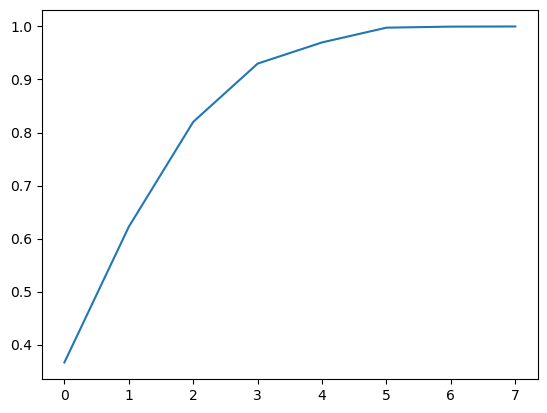

In [169]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [170]:
from sklearn.linear_model import Ridge,Lasso

In [171]:
rt = Ridge()

In [172]:
rt.fit(X_train,Y_train)

Ridge()

In [173]:
y_pred_ridge_test = rt.predict(X_test)
y_pred_ridge_train = rt.predict(X_train)

In [174]:
r2_score(Y_test,y_pred_ridge_test)

0.7130650785516819

In [175]:
r2_score(Y_train,y_pred_ridge_train)

0.7326136646607333

In [178]:
def save_model_2(x_train,y_train,x_test,y_test):
    mse_ta = []
    mse_te = []
    r2_ta =  []
    r2_te =  []
    models = ["PCA with XGBoost","Ridge Regression"]
    for i in [modelXGB,rt]:
        i.fit(x_train,y_train)
       
        f_test = i.predict(x_test)
        f_train = i.predict(x_train)
        mse_test = mean_squared_error(y_test,f_test)
        mse_train = mean_squared_error(y_train,f_train)
        r2_train = r2_score(y_train,f_train) 
        r2_test = r2_score(y_test,f_test)
        mse_ta.append(mse_train)
        mse_te.append(mse_test)
        r2_ta.append(r2_train)
        r2_te.append(r2_test)
    dic = {"Models" : models,
            "Mean square error(Train)" : mse_ta,
           "Mean square error(Test)" : mse_te,
            "r2 (Train)" : r2_ta,
            "r2(Test)" : r2_te}
    return pd.DataFrame(dic)  

In [179]:
save_model_2(X_train,Y_train,X_test,Y_test)

,Models,Mean square error(Train),Mean square error(Test),r2 (Train),r2(Test)
0,PCA with XGBoost,1.073,21.600,0.996,0.920
1,Ridge Regression,75.278,77.471,0.733,0.713
